# LSTM 모델을 이용한 텍스트 긍정부정 분석


## 텍스트 전처리(불용어 처리 포함)  & 
##      토크나이저(KoNLPy 사용, OKT 형태소 분석기)

## tensorflow


In [ ]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [7]:

import matplotlib.pyplot as plt

# 폰트 설정
import matplotlib.font_manager as fm

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fontprop = fm.FontProperties(fname=font_path, size=10)
# plt.rcParams['font.family'] = 'NanumGothic'
# plt.rcParams['axes.unicode_minus'] = False

font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 쇼핑몰 리뷰 감정 분석 (LSTM) - Google Colab

# 필요한 라이브러리 설치
!pip install konlpy tensorflow matplotlib seaborn wordcloud


  Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl (394 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1


TensorFlow 버전: 2.16.2
총 리뷰 데이터 수: 70
긍정 리뷰: 35개
부정 리뷰: 35개

2. 데이터 전처리 및 분석


/var/folders/xn/w4kqb1715fz7h49tp_h7hbmr0000gn/T/ipykernel_24069/2860040356.py:168: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([negative_lengths, positive_lengths], labels=['부정', '긍정'])


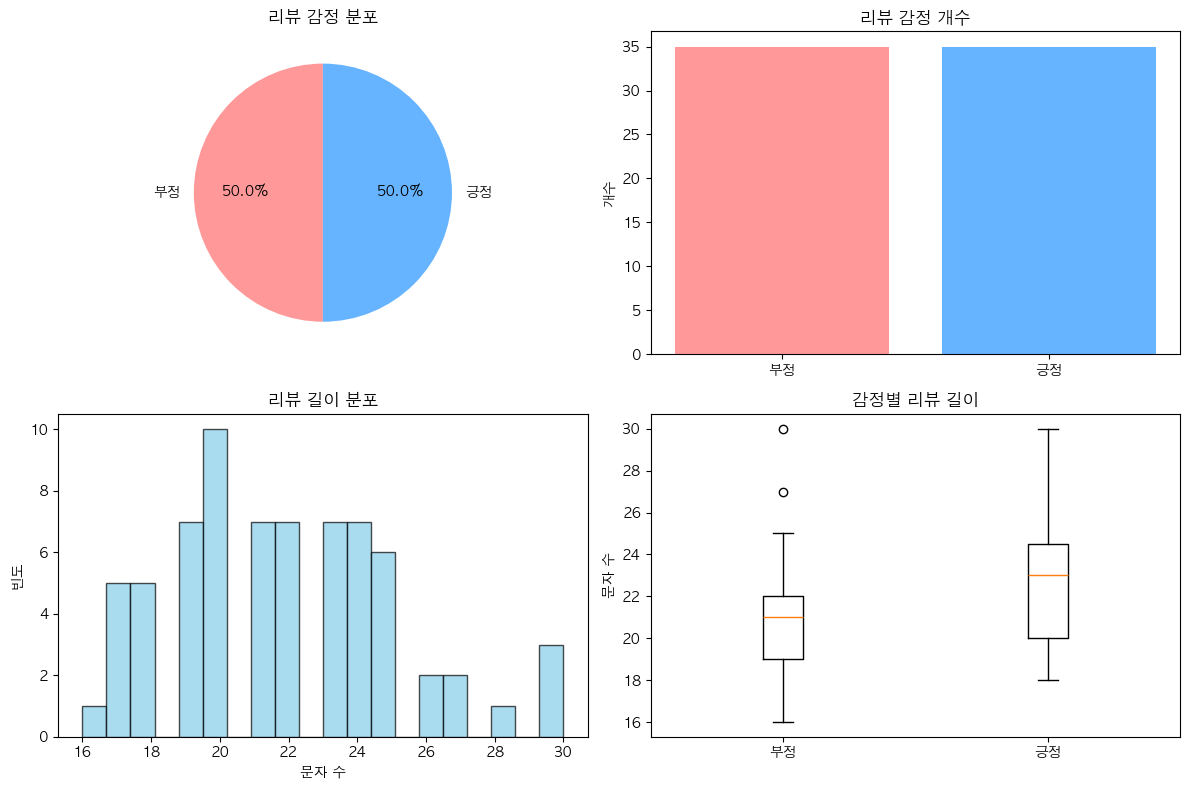

평균 리뷰 길이: 21.8자
최대 리뷰 길이: 30자
최소 리뷰 길이: 16자

3. 텍스트 전처리
전처리 전/후 비교:
1. 원본: 옷이 정말 예쁘고 품질도 좋아요. 사이즈도 딱 맞네요!
   전처리 후: 옷이 정말 예쁘고 품질도 좋아요 사이즈도 딱 맞네요

2. 원본: 배송이 빨라서 좋았고 포장도 깔끔했어요.
   전처리 후: 배송이 빨라서 좋았고 포장도 깔끔했어요

3. 원본: 가격 대비 품질이 너무 좋습니다. 재주문 의사 있어요!
   전처리 후: 가격 대비 품질이 너무 좋습니다 재주문 의사 있어요


4. 토큰화
토큰화 진행 중...
토큰화 결과 예시:
1. 원문: 옷이 정말 예쁘고 품질도 좋아요 사이즈도 딱 맞네요
   토큰: ['예쁘다', '품질', '좋다', '사이즈', '맞다']

2. 원문: 배송이 빨라서 좋았고 포장도 깔끔했어요
   토큰: ['배송', '좋다', '포장', '깔끔하다']

3. 원문: 가격 대비 품질이 너무 좋습니다 재주문 의사 있어요
   토큰: ['가격', '대비', '품질', '좋다', '주문', '의사', '있다']


5. 어휘 집합 생성
총 토큰 수: 342
고유 토큰 수: 217

빈도 상위 20개 토큰:
  좋다: 12번
  사용: 8번
  배송: 6번
  않다: 6번
  포장: 5번
  제품: 5번
  이에요: 5번
  같다: 5번
  품질: 4번
  가격: 4번
  주문: 4번
  없다: 4번
  예쁘다: 3번
  있다: 3번
  사진: 3번
  서비스: 3번
  만족하다: 3번
  마감: 3번
  처리: 3번
  피부: 3번

토크나이저 어휘 크기: 218
시퀀스 길이 통계:
  평균: 4.9
  중간값: 5.0
  최대: 8
  최소: 3

최종 데이터 형태:
X shape: (70, 50)
y shape: (70,)

6. 데이터 분할
훈련 데이터: 49개
검증 데이터: 10개
테스트 데이터: 11개
훈련 데이터 긍정 비율: 51.0%
검증 데이터 긍정 비율: 50.0%
테스트 데이터 긍정 비율: 4

/Users/kwangsiklee/miniforge3/envs/llmenv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


8. 모델 훈련
모델 훈련 시작...
Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.5207 - loss: 0.6963WARNING:tensorflow:5 out of the last 14 calls to <function TensorFlowTrainer._make_function.<locals>.multi_step_on_iterator at 0x3d4c83e20> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.5227 - loss: 0.6963 - val_accuracy: 0.3000 - val_loss: 0.6957 - learning_rate: 0.0010
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 7s/step - accu

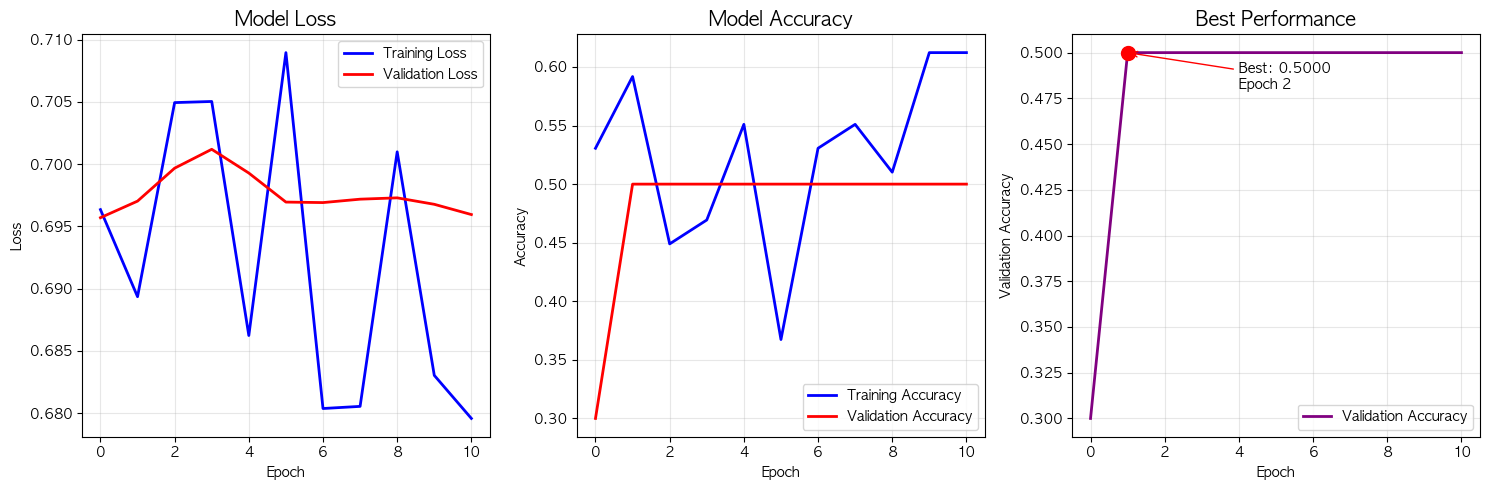


10. 모델 평가
테스트 정확도: 0.6364
테스트 손실: 0.6920
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step

분류 성능 리포트:
              precision    recall  f1-score   support

          부정       1.00      0.33      0.50         6
          긍정       0.56      1.00      0.71         5

    accuracy                           0.64        11
   macro avg       0.78      0.67      0.61        11
weighted avg       0.80      0.64      0.60        11



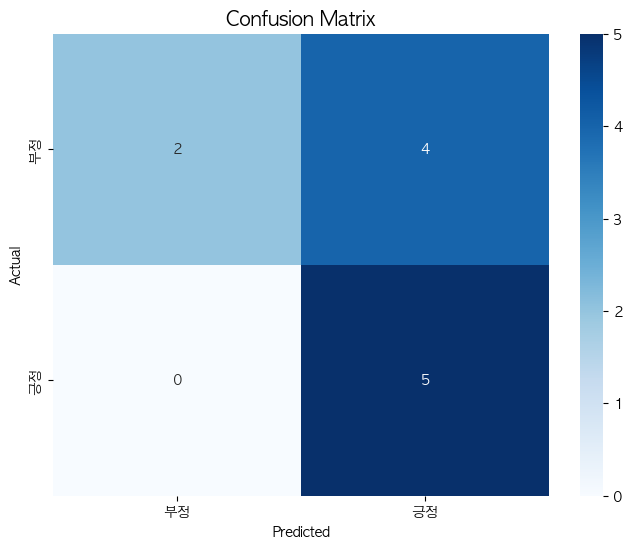


11. 예측 함수 구현

12. 새로운 리뷰 테스트
새로운 리뷰 감정 분석 결과:
----------------------------------------------------------------------
 1. ^^ '이 제품 정말 마음에 들어요! 품질도 좋고 가격도 합리적이에요.'
    ➜ 예측: 긍정 (신뢰도: 0.507, 점수: 0.507)

 2. ^^ '배송이 너무 늦고 포장도 엉망이었어요. 실망했습니다.'
    ➜ 예측: 긍정 (신뢰도: 0.503, 점수: 0.503)

 3. ^^ '사진과 실제 색깔이 달라서 교환하고 싶어요.'
    ➜ 예측: 긍정 (신뢰도: 0.501, 점수: 0.501)

 4. ^^ '고객센터 직원분이 너무 친절하고 문제를 빨리 해결해주셨어요.'
    ➜ 예측: 긍정 (신뢰도: 0.502, 점수: 0.502)

 5. ^^ '가성비 최고! 다음에도 여기서 쇼핑할게요.'
    ➜ 예측: 긍정 (신뢰도: 0.509, 점수: 0.509)

 6. TT '품질이 기대에 못 미치고 가격만 비싸네요.'
    ➜ 예측: 부정 (신뢰도: 0.503, 점수: 0.497)

 7. ^^ '포장이 꼼꼼하고 배송도 빨라서 만족해요.'
    ➜ 예측: 긍정 (신뢰도: 0.501, 점수: 0.501)

 8. ^^ '사용해보니 기능이 제대로 작동하지 않아요.'
    ➜ 예측: 긍정 (신뢰도: 0.502, 점수: 0.502)

 9. ^^ '디자인이 예쁘고 실용적이에요. 추천합니다!'
    ➜ 예측: 긍정 (신뢰도: 0.505, 점수: 0.505)

10. ^^ '환불 신청했는데 처리가 너무 복잡하고 느려요.'
    ➜ 예측: 긍정 (신뢰도: 0.507, 점수: 0.507)



In [8]:

# 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import pandas as pd

import seaborn as sns
from collections import Counter
import re
from konlpy.tag import Okt
from wordcloud import WordCloud

print("TensorFlow 버전:", tf.__version__)

# ==============================================================================
# 1. 쇼핑몰 리뷰 데이터셋 생성
# ==============================================================================

# 한국 쇼핑몰 리뷰 데이터 (긍정: 1, 부정: 0)
shopping_reviews = [
    # 긍정 리뷰 (의류)
    ("옷이 정말 예쁘고 품질도 좋아요. 사이즈도 딱 맞네요!", 1),
    ("배송이 빨라서 좋았고 포장도 깔끔했어요.", 1),
    ("가격 대비 품질이 너무 좋습니다. 재주문 의사 있어요!", 1),
    ("디자인이 사진과 똑같고 원단도 부드러워요.", 1),
    ("색깔이 너무 예쁘고 핏도 완벽해요. 강추!", 1),

    # 긍정 리뷰 (전자제품)
    ("제품 성능이 기대 이상이에요. 사용법도 간단하고요.", 1),
    ("A/S 서비스가 정말 친절하고 빨라서 만족합니다.", 1),
    ("배터리 지속시간이 길어서 편리해요.", 1),
    ("화면이 선명하고 소리도 깨끗해요.", 1),
    ("가성비 최고! 이 가격에 이런 퀄리티라니.", 1),

    # 긍정 리뷰 (생활용품)
    ("실용적이고 디자인도 심플해서 마음에 들어요.", 1),
    ("내구성이 좋아 보이고 사용하기 편해요.", 1),
    ("집에서 잘 쓰고 있어요. 크기도 적당하고요.", 1),
    ("재료가 안전해 보이고 마감 처리도 깔끔해요.", 1),
    ("기능이 다양해서 활용도가 높아요.", 1),

    # 긍정 리뷰 (화장품)
    ("피부에 자극 없이 부드럽게 발라져요.", 1),
    ("커버력이 좋고 지속력도 만족스러워요.", 1),
    ("향이 은은하고 보습 효과도 좋아요.", 1),
    ("민감성 피부인데도 트러블 없이 사용 중이에요.", 1),
    ("화장이 잘 받고 자연스러운 발색이에요.", 1),

    # 긍정 리뷰 (음식)
    ("맛이 정말 좋고 신선해요. 포장도 튼튼하고요.", 1),
    ("원재료가 좋은 것 같고 건강한 맛이에요.", 1),
    ("가족 모두 맛있게 먹었어요. 또 주문할게요.", 1),
    ("배송 중에도 신선도가 유지되어서 만족해요.", 1),
    ("간이 적당하고 질리지 않는 맛이에요.", 1),

    # 부정 리뷰 (의류)
    ("사진과 색깔이 완전 달라요. 실망이에요.", 0),
    ("원단이 너무 얇고 싸구려 같아요.", 0),
    ("사이즈가 너무 작아요. 교환하고 싶어요.", 0),
    ("실밥이 많이 나오고 마감이 조잡해요.", 0),
    ("세탁 한 번 했는데 늘어나고 색이 바랬어요.", 0),

    # 부정 리뷰 (전자제품)
    ("제품이 금방 고장났어요. 품질이 의심스럽네요.", 0),
    ("소음이 너무 심해서 사용하기 힘들어요.", 0),
    ("배터리가 너무 빨리 닳아요. 불량품 같아요.", 0),
    ("설명서와 다르게 작동해서 불편해요.", 0),
    ("A/S 센터 연락이 안 되고 서비스가 불친절해요.", 0),

    # 부정 리뷰 (생활용품)
    ("냄새가 너무 심해서 사용할 수 없어요.", 0),
    ("내구성이 떨어져서 금방 망가졌어요.", 0),
    ("크기가 설명과 달라서 사용하기 어려워요.", 0),
    ("재질이 거칠고 마감이 엉성해요.", 0),
    ("기능이 제대로 작동하지 않아요.", 0),

    # 부정 리뷰 (화장품)
    ("피부에 트러블이 생겨서 사용 중단했어요.", 0),
    ("커버력이 전혀 없고 쉽게 지워져요.", 0),
    ("향이 너무 독해서 사용하기 힘들어요.", 0),
    ("보습 효과가 전혀 없고 오히려 건조해져요.", 0),
    ("발색이 이상하고 얼룩덜룩해져요.", 0),

    # 부정 리뷰 (음식)
    ("맛이 이상하고 신선하지 않아요.", 0),
    ("포장이 엉성해서 배송 중에 내용물이 새었어요.", 0),
    ("유통기한이 얼마 남지 않았는데 미리 알려주지 않았어요.", 0),
    ("너무 짜고 인공 조미료 맛이 강해요.", 0),
    ("가격에 비해 양이 너무 적어요.", 0),

    # 추가 긍정 리뷰
    ("고객센터 직원이 정말 친절하고 도움이 되었어요.", 1),
    ("무료배송에 빠른 배송까지 완벽해요.", 1),
    ("선물 포장 서비스가 정말 예뻐요.", 1),
    ("환불 처리가 빠르고 간편해서 믿을 만해요.", 1),
    ("멤버십 혜택이 좋아서 자주 이용하게 되네요.", 1),
    ("같은 제품 다른 곳보다 저렴해서 만족해요.", 1),
    ("리뷰를 보고 주문했는데 정말 좋네요.", 1),
    ("친구 추천으로 샀는데 역시 좋아요.", 1),
    ("브랜드를 믿고 샀는데 역시 실망시키지 않네요.", 1),
    ("할인 이벤트 때 저렴하게 좋은 제품 구매했어요.", 1),

    # 추가 부정 리뷰
    ("배송이 너무 늦어서 급한데 못 써요.", 0),
    ("포장이 너무 대충되어 있어서 상품이 상했어요.", 0),
    ("고객센터에 문의했는데 답변이 불친절해요.", 0),
    ("환불 신청했는데 처리가 너무 늦어요.", 0),
    ("사진과 실제 상품이 너무 달라요.", 0),
    ("가격이 비싼데 품질이 그에 못 미쳐요.", 0),
    ("재고가 없다고 하면서 주문 취소됐어요.", 0),
    ("배송비가 비싸서 부담스러워요.", 0),
    ("같은 제품인데 다른 곳이 더 저렴해요.", 0),
    ("회원가입 과정이 복잡하고 번거로워요.", 0)
]

print(f"총 리뷰 데이터 수: {len(shopping_reviews)}")
print(f"긍정 리뷰: {sum(1 for _, label in shopping_reviews if label == 1)}개")
print(f"부정 리뷰: {sum(1 for _, label in shopping_reviews if label == 0)}개")

# ==============================================================================
# 2. 데이터 전처리 및 분석
# ==============================================================================

print("\n" + "=" * 60)
print("2. 데이터 전처리 및 분석")
print("=" * 60)

# 데이터프레임으로 변환
df = pd.DataFrame(shopping_reviews, columns=['review', 'sentiment'])

# 데이터 분포 시각화
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sentiment_counts = df['sentiment'].value_counts()
colors = ['#ff9999', '#66b3ff']
plt.pie(sentiment_counts.values, labels=['부정', '긍정'], autopct='%1.1f%%',
        colors=colors, startangle=90)
plt.title('리뷰 감정 분포')

plt.subplot(2, 2, 2)
plt.bar(['부정', '긍정'], sentiment_counts.values, color=colors)
plt.title('리뷰 감정 개수')
plt.ylabel('개수')

# 리뷰 길이 분석
review_lengths = df['review'].str.len()
df['review_length'] = review_lengths  # 길이 컬럼 추가

plt.subplot(2, 2, 3)
plt.hist(review_lengths, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('리뷰 길이 분포')
plt.xlabel('문자 수')
plt.ylabel('빈도')

plt.subplot(2, 2, 4)
# 감정별 리뷰 길이 boxplot
positive_lengths = df[df['sentiment'] == 1]['review_length']
negative_lengths = df[df['sentiment'] == 0]['review_length']

plt.boxplot([negative_lengths, positive_lengths], labels=['부정', '긍정'])
plt.title('감정별 리뷰 길이')
plt.ylabel('문자 수')

plt.tight_layout()
plt.show()

print(f"평균 리뷰 길이: {review_lengths.mean():.1f}자")
print(f"최대 리뷰 길이: {review_lengths.max()}자")
print(f"최소 리뷰 길이: {review_lengths.min()}자")

# ==============================================================================
# 3. 텍스트 전처리 함수
# ==============================================================================

print("\n" + "=" * 60)
print("3. 텍스트 전처리")
print("=" * 60)

def preprocess_text(text):
    """한글 텍스트 전처리 함수"""
    # 특수문자 제거 (한글, 영어, 숫자, 공백만 남김)
    text = re.sub(r'[^가-힣a-zA-Z0-9\s]', '', text)
    # 여러 공백을 하나로
    text = re.sub(r'\s+', ' ', text)
    # 앞뒤 공백 제거
    text = text.strip()
    return text

# 전처리 적용
df['cleaned_review'] = df['review'].apply(preprocess_text)

print("전처리 전/후 비교:")
for i in range(3):
    print(f"{i+1}. 원본: {df['review'].iloc[i]}")
    print(f"   전처리 후: {df['cleaned_review'].iloc[i]}")
    print()

# ==============================================================================
# 4. 토큰화 (KoNLPy 사용)
# ==============================================================================

print("\n" + "=" * 60)
print("4. 토큰화")
print("=" * 60)

# OKT 형태소 분석기 초기화
okt = Okt()

# 불용어 정의
stopwords = [
    '의', '가', '이', '은', '들', '는', '과', '도', '를', '으로', '자', '에', '와', '한', '하다',
    '에서', '하고', '해서', '까지', '에게', '께서', '부터', '어서', '면서', '라서', '이나', '나',
    '그', '저', '것', '수', '등', '같은', '및', '또', '더', '잘', '너무', '정말', '진짜'
]

def tokenize_text(text):
    """텍스트 토큰화 함수"""
    try:
        # 형태소 분석
        tokens = okt.morphs(text, stem=True)  # stem=True로 어간 추출
        # 불용어 제거 및 길이 2 이상인 토큰만 사용
        tokens = [token for token in tokens if token not in stopwords and len(token) >= 2]
        return tokens
    except:
        return []

# 토큰화 수행
print("토큰화 진행 중...")
df['tokens'] = df['cleaned_review'].apply(tokenize_text)

# 토큰화 결과 확인
print("토큰화 결과 예시:")
for i in range(3):
    print(f"{i+1}. 원문: {df['cleaned_review'].iloc[i]}")
    print(f"   토큰: {df['tokens'].iloc[i]}")
    print()

# ==============================================================================
# 5. 어휘 집합 생성 및 정수 인코딩
# ==============================================================================

print("\n" + "=" * 60)
print("5. 어휘 집합 생성")
print("=" * 60)

# 모든 토큰 수집
all_tokens = []
for tokens in df['tokens']:
    all_tokens.extend(tokens)

# 토큰 빈도 계산
token_counts = Counter(all_tokens)
print(f"총 토큰 수: {len(all_tokens):,}")
print(f"고유 토큰 수: {len(token_counts):,}")

# 빈도 상위 토큰들 출력
print("\n빈도 상위 20개 토큰:")
for token, count in token_counts.most_common(20):
    print(f"  {token}: {count}번")

# 토크나이저 설정
max_features = 5000  # 최대 어휘 수
max_length = 50      # 최대 시퀀스 길이

tokenizer = Tokenizer(
    num_words=max_features,
    oov_token="<OOV>",
    filters=''  # 이미 전처리했으므로 추가 필터링 안함
)

# 토큰 리스트를 문자열로 변환
token_texts = [' '.join(tokens) for tokens in df['tokens']]
tokenizer.fit_on_texts(token_texts)

print(f"\n토크나이저 어휘 크기: {len(tokenizer.word_index)}")

# 시퀀스 변환
sequences = tokenizer.texts_to_sequences(token_texts)

# 시퀀스 길이 분석
seq_lengths = [len(seq) for seq in sequences]
print(f"시퀀스 길이 통계:")
print(f"  평균: {np.mean(seq_lengths):.1f}")
print(f"  중간값: {np.median(seq_lengths):.1f}")
print(f"  최대: {max(seq_lengths)}")
print(f"  최소: {min(seq_lengths)}")

# 패딩 적용
X = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')
y = df['sentiment'].values

print(f"\n최종 데이터 형태:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

# ==============================================================================
# 6. 데이터 분할
# ==============================================================================

print("\n" + "=" * 60)
print("6. 데이터 분할")
print("=" * 60)

# 훈련/검증/테스트 분할
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"검증 데이터: {X_val.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")

# 분할 후 레이블 분포 확인
for name, y_data in [("훈련", y_train), ("검증", y_val), ("테스트", y_test)]:
    pos_ratio = np.mean(y_data) * 100
    print(f"{name} 데이터 긍정 비율: {pos_ratio:.1f}%")

# ==============================================================================
# 7. LSTM 모델 구축
# ==============================================================================

print("\n" + "=" * 60)
print("7. LSTM 모델 구축")
print("=" * 60)

def create_model(vocab_size, embedding_dim=128, lstm_units=64, dropout_rate=0.3):
    """LSTM 감정 분석 모델 생성"""
    model = Sequential([
        # 임베딩 층
        Embedding(vocab_size, embedding_dim, input_length=max_length),

        # 양방향 LSTM 층
        Bidirectional(LSTM(lstm_units, dropout=dropout_rate, recurrent_dropout=dropout_rate)),

        # 완전연결층
        Dense(64, activation='relu'),
        Dropout(dropout_rate),

        Dense(32, activation='relu'),
        Dropout(dropout_rate * 0.5),

        # 출력층
        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# 모델 생성
vocab_size = min(max_features, len(tokenizer.word_index)) + 1
model = create_model(vocab_size)

print("모델 구조:")
model.summary()

# ==============================================================================
# 8. 모델 훈련
# ==============================================================================

print("\n" + "=" * 60)
print("8. 모델 훈련")
print("=" * 60)

# 콜백 설정
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-7,
        verbose=1
    )
]

# 모델 훈련
print("모델 훈련 시작...")
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_data=(X_val, y_val),
    callbacks=callbacks,
    verbose=1
)

# ==============================================================================
# 9. 훈련 과정 시각화
# ==============================================================================

print("\n" + "=" * 60)
print("9. 훈련 과정 시각화")
print("=" * 60)

plt.figure(figsize=(15, 5))

# 손실 그래프
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'b-', label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss', linewidth=2)
plt.title('Model Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# 정확도 그래프
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'r-', label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

# 최고 성능 표시
plt.subplot(1, 3, 3)
val_acc = history.history['val_accuracy']
best_epoch = np.argmax(val_acc) + 1
best_acc = max(val_acc)
plt.plot(val_acc, 'purple', linewidth=2, label='Validation Accuracy')
plt.scatter(best_epoch-1, best_acc, color='red', s=100, zorder=5)
plt.annotate(f'Best: {best_acc:.4f}\nEpoch {best_epoch}',
             xy=(best_epoch-1, best_acc), xytext=(best_epoch+2, best_acc-0.02),
             arrowprops=dict(arrowstyle='->', color='red'))
plt.title('Best Performance', fontsize=14, fontweight='bold')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ==============================================================================
# 10. 모델 평가
# ==============================================================================

print("\n" + "=" * 60)
print("10. 모델 평가")
print("=" * 60)

# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 정확도: {test_accuracy:.4f}")
print(f"테스트 손실: {test_loss:.4f}")

# 예측 수행
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# 분류 리포트
print("\n분류 성능 리포트:")
print(classification_report(y_test, y_pred, target_names=['부정', '긍정']))

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['부정', '긍정'], yticklabels=['부정', '긍정'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ==============================================================================
# 11. 예측 함수 구현
# ==============================================================================

print("\n" + "=" * 60)
print("11. 예측 함수 구현")
print("=" * 60)

def predict_sentiment(text, model, tokenizer, okt, max_length=50):
    """새로운 리뷰에 대한 감정 예측"""
    # 전처리
    cleaned_text = preprocess_text(text)

    # 토큰화
    tokens = tokenize_text(cleaned_text)
    token_text = ' '.join(tokens)

    # 시퀀스 변환
    sequence = tokenizer.texts_to_sequences([token_text])
    padded = pad_sequences(sequence, maxlen=max_length, padding='post', truncating='post')

    # 예측
    prediction = model.predict(padded, verbose=0)[0][0]

    sentiment = "긍정" if prediction > 0.5 else "부정"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    return sentiment, confidence, prediction

# ==============================================================================
# 12. 새로운 리뷰 테스트
# ==============================================================================

print("\n" + "=" * 60)
print("12. 새로운 리뷰 테스트")
print("=" * 60)

# 테스트할 새로운 리뷰들
test_reviews = [
    "이 제품 정말 마음에 들어요! 품질도 좋고 가격도 합리적이에요.",
    "배송이 너무 늦고 포장도 엉망이었어요. 실망했습니다.",
    "사진과 실제 색깔이 달라서 교환하고 싶어요.",
    "고객센터 직원분이 너무 친절하고 문제를 빨리 해결해주셨어요.",
    "가성비 최고! 다음에도 여기서 쇼핑할게요.",
    "품질이 기대에 못 미치고 가격만 비싸네요.",
    "포장이 꼼꼼하고 배송도 빨라서 만족해요.",
    "사용해보니 기능이 제대로 작동하지 않아요.",
    "디자인이 예쁘고 실용적이에요. 추천합니다!",
    "환불 신청했는데 처리가 너무 복잡하고 느려요."
]

print("새로운 리뷰 감정 분석 결과:")
print("-" * 70)

for i, review in enumerate(test_reviews, 1):
    sentiment, confidence, raw_score = predict_sentiment(review, model, tokenizer, okt)
    emoji = "^^" if sentiment == "긍정" else "TT"

    print(f"{i:2d}. {emoji} '{review}'")
    print(f"    ➜ 예측: {sentiment} (신뢰도: {confidence:.3f}, 점수: {raw_score:.3f})")
    print()
